In [1]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.6 MB/s eta 0:00:00


In [2]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 23.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [3]:
pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [4]:
!pip install emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.6 MB/s eta 0:00:00


In [5]:
pip install -U scikit-learn

In [6]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import re
import string
import tensorflow
import json
from wordcloud import ImageColorGenerator, STOPWORDS, WordCloud
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import accuracy_score,  f1_score, make_scorer, precision_score, recall_score
from sklearn.metrics import auc, roc_auc_score,roc_curve, RocCurveDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC

In [8]:
# Ubah path sesuai lokasi file dataset
dataset = pd.read_csv('Spotify.csv')

In [9]:
# Text Preprocessing
# Case Folding
def casefoldingText(text): # Mengubah string menjadi huruf kecil
    text = text.lower()
    return text


dataset['Text_CaseFolding'] = dataset['content'].apply(casefoldingText)
dataset

,userName,score,at,content,Text_CaseFolding
0,Ahmad Tohari,5,4/27/2024 14:34,enak untuk di dengar,enak untuk di dengar
1,Anis Khairunissa,5,4/27/2024 14:31,Kayanya bagus,kayanya bagus
2,Niken Ferdilla,4,4/27/2024 14:22,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...
3,Dedi Irawan,4,4/27/2024 14:17,Its good and song,its good and song
4,Ikrima Meilani,1,4/27/2024 14:00,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh🤭 masa ga masuk ke ...
...,...,...,...,...,...
2980,Mukana Simanullang,4,3/18/2024 16:34,Aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang 4 ); soalnya dah premium mas...
2981,Bagas Offical,1,3/18/2024 16:05,s,s
2982,Wira hd,5,3/18/2024 15:45,Mantap,mantap
2983,Muhammad Hanif,1,3/18/2024 15:42,Kebanyakan iklan skian Terima kasih,kebanyakan iklan skian terima kasih


In [ ]:
characters = ['.',',',';',':','-,','...','?','!','(',')','[',']','{','}','<','>','"','/','\
 ', '#', '-', '@','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's','t', 'u', 'v', 'w', 'x', 'y', 'z',
 'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

def repeatcharClean(text): # hapus karakter berulang
    for i in range(len(characters)):
        charac_long = 5
        while charac_long > 2:
            char = characters[i]*charac_long
            text = text.replace(char,characters[i])
            charac_long -= 1
    return text

In [10]:
#Cleaning Text

def cleaningText(text): ## Membersihkan set data
    text = " ".join(text) if isinstance(text, list) else text
    # Remove punctuation but keep spaces intact
    text = re.sub(r'[^\w\s]', '', text)
    # Remove symbols and special characters but keep spaces intact
    text = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', text)
    # Remove numbers
    text = re.sub(r'[0-9]+', '', text)
    # Replace new lines with spaces
    text = text.replace('\n', ' ')
    # Remove additional punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Strip excessive whitespace
    text = text.strip()
    # Remove emoticons
    text = re.sub(r"([xX;:]'?[dDpPv VoO3)(])", ' ', text)
    # Remove repeating characters
    text = re.sub(r'(.)\1+', r'\1', text)
    # Remove repeating characters, except for letters
    text = re.sub(r'([a-zA-Z])\1+', r'\1\1', text)
    # Convert emojis to text
    text = emoji.demojize(text)
    # Remove emoji descriptions
    text = re.sub(r':[^:]+:', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Convert text to lowercase

    return text.lower()

# Applying the function to the dataset
dataset['Text_Cleaning'] = dataset['Text_CaseFolding'].apply(cleaningText)
dataset

,userName,score,at,content,Text_CaseFolding,Text_Cleaning
0,Ahmad Tohari,5,4/27/2024 14:34,enak untuk di dengar,enak untuk di dengar,enak untuk di dengar
1,Anis Khairunissa,5,4/27/2024 14:31,Kayanya bagus,kayanya bagus,kayanya bagus
2,Niken Ferdilla,4,4/27/2024 14:22,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...
3,Dedi Irawan,4,4/27/2024 14:17,Its good and song,its good and song,its god and song
4,Ikrima Meilani,1,4/27/2024 14:00,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh masa ga masuk ke a...
...,...,...,...,...,...,...
2980,Mukana Simanullang,4,3/18/2024 16:34,Aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang soalnya dah premium masa tul...
2981,Bagas Offical,1,3/18/2024 16:05,s,s,s
2982,Wira hd,5,3/18/2024 15:45,Mantap,mantap,mantap
2983,Muhammad Hanif,1,3/18/2024 15:42,Kebanyakan iklan skian Terima kasih,kebanyakan iklan skian terima kasih,kebanyakan iklan skian terima kasih


In [11]:
#Tokenize

from nltk.tokenize import word_tokenize
def tokenizingText(text): # Memisah tiap string/kata menjadi token
    text = word_tokenize(text)
    return text

dataset['Text_Tokenize'] = dataset['Text_Cleaning'].apply(tokenizingText)
dataset

,userName,score,at,content,Text_CaseFolding,Text_Cleaning,Text_Tokenize
0,Ahmad Tohari,5,4/27/2024 14:34,enak untuk di dengar,enak untuk di dengar,enak untuk di dengar,"[enak, untuk, di, dengar]"
1,Anis Khairunissa,5,4/27/2024 14:31,Kayanya bagus,kayanya bagus,kayanya bagus,"[kayanya, bagus]"
2,Niken Ferdilla,4,4/27/2024 14:22,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...,"[pokoknya, aplikasi, ini, bikin, kita, tenang,..."
3,Dedi Irawan,4,4/27/2024 14:17,Its good and song,its good and song,its god and song,"[its, god, and, song]"
4,Ikrima Meilani,1,4/27/2024 14:00,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh masa ga masuk ke a...,"[padahal, sinyal, udah, pul, loh, masa, ga, ma..."
...,...,...,...,...,...,...,...
2980,Mukana Simanullang,4,3/18/2024 16:34,Aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang soalnya dah premium masa tul...,"[aku, kasih, bintang, soalnya, dah, premium, m..."
2981,Bagas Offical,1,3/18/2024 16:05,s,s,s,[s]
2982,Wira hd,5,3/18/2024 15:45,Mantap,mantap,mantap,[mantap]
2983,Muhammad Hanif,1,3/18/2024 15:42,Kebanyakan iklan skian Terima kasih,kebanyakan iklan skian terima kasih,kebanyakan iklan skian terima kasih,"[kebanyakan, iklan, skian, terima, kasih]"


In [12]:
#normalize

def slangwords(text): # Mengubah kata tidak baku menjadi kata baku
    try:
        with open('Alaye.json', 'r') as f:  # Open the JSON file
            kamus_alay = json.load(f)  # Load the JSON data into a dictionary

        res = []
        for word in text:
            res.append(kamus_alay.get(word, word))  # Look up slang words
        return res

    except FileNotFoundError:
        print("Error: 'Alaye.json' not found. Check the file path.")
        return text
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return text

dataset['Text_SlangLookup'] = dataset['Text_Tokenize'].apply(slangwords)
dataset

,userName,score,at,content,Text_CaseFolding,Text_Cleaning,Text_Tokenize,Text_SlangLookup
0,Ahmad Tohari,5,4/27/2024 14:34,enak untuk di dengar,enak untuk di dengar,enak untuk di dengar,"[enak, untuk, di, dengar]","[enak, untuk, di, dengar]"
1,Anis Khairunissa,5,4/27/2024 14:31,Kayanya bagus,kayanya bagus,kayanya bagus,"[kayanya, bagus]","[kayanya, bagus]"
2,Niken Ferdilla,4,4/27/2024 14:22,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...,"[pokoknya, aplikasi, ini, bikin, kita, tenang,...","[pokoknya, aplikasi, ini, bikin, kita, tenang,..."
3,Dedi Irawan,4,4/27/2024 14:17,Its good and song,its good and song,its god and song,"[its, god, and, song]","[its, bagus, and, song]"
4,Ikrima Meilani,1,4/27/2024 14:00,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh masa ga masuk ke a...,"[padahal, sinyal, udah, pul, loh, masa, ga, ma...","[padahal, sinyal, sudah, full, loh, masa, tida..."
...,...,...,...,...,...,...,...,...
2980,Mukana Simanullang,4,3/18/2024 16:34,Aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang soalnya dah premium masa tul...,"[aku, kasih, bintang, soalnya, dah, premium, m...","[aku, kasih, bintang, soalnya, deh, premium, m..."
2981,Bagas Offical,1,3/18/2024 16:05,s,s,s,[s],[si]
2982,Wira hd,5,3/18/2024 15:45,Mantap,mantap,mantap,[mantap],[mantap]
2983,Muhammad Hanif,1,3/18/2024 15:42,Kebanyakan iklan skian Terima kasih,kebanyakan iklan skian terima kasih,kebanyakan iklan skian terima kasih,"[kebanyakan, iklan, skian, terima, kasih]","[kebanyakan, iklan, skian, terima, kasih]"


In [13]:
#Stopwords

def filteringText(text): # Menghapus stopwords
    listStopwords = set(stopwords.words('indonesian'))
    keep_stopwords = ['biasa', 'aplikasi', 'jangan', 'jelek', 'keterlaluan', 'kurang', 'lama',
                      'masalah', 'mungkin', 'suka', 'sedikit', 'sekali', 'good', 'update'
                      'lagu', 'tidak', 'ada', 'lirik', 'baik', 'benar', 'download','berhenti',
                      'besar', 'betul', 'jelas', 'mau', 'premium', 'offline', 'jelas', 'musik',
                      'podcast', 'ok', 'benci', 'penting', 'biasa', 'segera', 'dengar','langganan',
                      'sudah', 'tetap', 'terutama', 'iklan', 'bagus', 'kecewa', 'mantap', 'spotify'
                      'bagus','ganggu', 'galau','sad','senang', 'eror','banget', 'sedikit','kuota'] # Changed to a list

    filtered = []
    for txt in text:
        if txt not in listStopwords or txt in keep_stopwords:
            filtered.append(txt)
    text = filtered
    return text

dataset['Text_SWremoval'] = dataset['Text_SlangLookup'].apply(filteringText)
dataset

,userName,score,at,content,Text_CaseFolding,Text_Cleaning,Text_Tokenize,Text_SlangLookup,Text_SWremoval
0,Ahmad Tohari,5,4/27/2024 14:34,enak untuk di dengar,enak untuk di dengar,enak untuk di dengar,"[enak, untuk, di, dengar]","[enak, untuk, di, dengar]","[enak, dengar]"
1,Anis Khairunissa,5,4/27/2024 14:31,Kayanya bagus,kayanya bagus,kayanya bagus,"[kayanya, bagus]","[kayanya, bagus]","[kayanya, bagus]"
2,Niken Ferdilla,4,4/27/2024 14:22,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...,"[pokoknya, aplikasi, ini, bikin, kita, tenang,...","[pokoknya, aplikasi, ini, bikin, kita, tenang,...","[pokoknya, aplikasi, bikin, tenang, ada, masal..."
3,Dedi Irawan,4,4/27/2024 14:17,Its good and song,its good and song,its god and song,"[its, god, and, song]","[its, bagus, and, song]","[its, bagus, and, song]"
4,Ikrima Meilani,1,4/27/2024 14:00,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh masa ga masuk ke a...,"[padahal, sinyal, udah, pul, loh, masa, ga, ma...","[padahal, sinyal, sudah, full, loh, masa, tida...","[sinyal, sudah, full, loh, tidak, masuk, aplik..."
...,...,...,...,...,...,...,...,...,...
2980,Mukana Simanullang,4,3/18/2024 16:34,Aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang soalnya dah premium masa tul...,"[aku, kasih, bintang, soalnya, dah, premium, m...","[aku, kasih, bintang, soalnya, deh, premium, m...","[kasih, bintang, deh, premium, tulisan, lirik,..."
2981,Bagas Offical,1,3/18/2024 16:05,s,s,s,[s],[si],[si]
2982,Wira hd,5,3/18/2024 15:45,Mantap,mantap,mantap,[mantap],[mantap],[mantap]
2983,Muhammad Hanif,1,3/18/2024 15:42,Kebanyakan iklan skian Terima kasih,kebanyakan iklan skian terima kasih,kebanyakan iklan skian terima kasih,"[kebanyakan, iklan, skian, terima, kasih]","[kebanyakan, iklan, skian, terima, kasih]","[kebanyakan, iklan, skian, terima, kasih]"


In [14]:
#Stemming

def stemmingText(text): # Memenggal kata menjadi bentuk dasarnya
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

dataset['Text_Stemming'] = dataset['Text_SWremoval'].apply(stemmingText)
dataset

,userName,score,at,content,Text_CaseFolding,Text_Cleaning,Text_Tokenize,Text_SlangLookup,Text_SWremoval,Text_Stemming
0,Ahmad Tohari,5,4/27/2024 14:34,enak untuk di dengar,enak untuk di dengar,enak untuk di dengar,"[enak, untuk, di, dengar]","[enak, untuk, di, dengar]","[enak, dengar]","[enak, dengar]"
1,Anis Khairunissa,5,4/27/2024 14:31,Kayanya bagus,kayanya bagus,kayanya bagus,"[kayanya, bagus]","[kayanya, bagus]","[kayanya, bagus]","[kaya, bagus]"
2,Niken Ferdilla,4,4/27/2024 14:22,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...,pokoknya aplikasi ini bikin kita tenang kalo a...,"[pokoknya, aplikasi, ini, bikin, kita, tenang,...","[pokoknya, aplikasi, ini, bikin, kita, tenang,...","[pokoknya, aplikasi, bikin, tenang, ada, masal...","[pokok, aplikasi, bikin, tenang, ada, masalah,..."
3,Dedi Irawan,4,4/27/2024 14:17,Its good and song,its good and song,its god and song,"[its, god, and, song]","[its, bagus, and, song]","[its, bagus, and, song]","[its, bagus, and, song]"
4,Ikrima Meilani,1,4/27/2024 14:00,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh🤭 masa ga masuk ke ...,padahal sinyal udah pul loh masa ga masuk ke a...,"[padahal, sinyal, udah, pul, loh, masa, ga, ma...","[padahal, sinyal, sudah, full, loh, masa, tida...","[sinyal, sudah, full, loh, tidak, masuk, aplik...","[sinyal, sudah, full, loh, tidak, masuk, aplik..."
...,...,...,...,...,...,...,...,...,...,...
2980,Mukana Simanullang,4,3/18/2024 16:34,Aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang 4 ); soalnya dah premium mas...,aku kasih bintang soalnya dah premium masa tul...,"[aku, kasih, bintang, soalnya, dah, premium, m...","[aku, kasih, bintang, soalnya, deh, premium, m...","[kasih, bintang, deh, premium, tulisan, lirik,...","[kasih, bintang, deh, premium, tulis, lirik, l..."
2981,Bagas Offical,1,3/18/2024 16:05,s,s,s,[s],[si],[si],[si]
2982,Wira hd,5,3/18/2024 15:45,Mantap,mantap,mantap,[mantap],[mantap],[mantap],[mantap]
2983,Muhammad Hanif,1,3/18/2024 15:42,Kebanyakan iklan skian Terima kasih,kebanyakan iklan skian terima kasih,kebanyakan iklan skian terima kasih,"[kebanyakan, iklan, skian, terima, kasih]","[kebanyakan, iklan, skian, terima, kasih]","[kebanyakan, iklan, skian, terima, kasih]","[banyak, iklan, ski, terima, kasih]"


In [ ]:
dataset.drop_duplicates(subset=['Text_Stemming'], inplace=True)

In [15]:
#Labeling

def label_score(score):
  if score in [1, 2, 3]:
    return 'negative'
  elif score in [4, 5]:
    return 'positive'
  else:
    return 'unknown'
dataset['label'] = dataset['score'].apply(label_score)
print(dataset['label'].value_counts())

label
positive    1852
negative    1133
Name: count, dtype: int64


In [ ]:
# prompt: download dataset 'Text_Slanglookup'

from google.colab import files

dataset.to_csv('Text_Stemming.csv')
files.download('Text_Stemming.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# TF-IDF
dataset['Text_Stemming'] = dataset['Text_Stemming'].apply(' '.join)

cv = CountVectorizer()
tv = TfidfVectorizer()

count = cv.fit_transform(dataset['Text_Stemming'])
tf_v = tv.fit_transform(dataset['Text_Stemming'])

In [ ]:
# Melihat ukuran matriks (jumlah dokumen x jumlah kata unik)
print("Ukuran matriks TF-IDF:", tf_v.shape)

# Melihat 5 baris pertama dari matriks (sparse matrix)

print(tf_v[:5])

# Mengubah matriks ke array numpy untuk melihat isinya lebih jelas
tf_v_array = tf_v.toarray()



Ukuran matriks TF-IDF: (2244, 2570)
  (0, 653)	0.8036411099487345
  (0, 524)	0.5951142465110091
  (1, 1102)	0.9446076239047482
  (1, 194)	0.32820182336639403
  (2, 1832)	0.32390961521176287
  (2, 122)	0.17589613397641315
  (2, 333)	0.3051442387797841
  (2, 2326)	0.43179771335763306
  (2, 12)	0.1919239286207835
  (2, 1412)	0.3348695137199539
  (2, 2356)	0.37156385882114473
  (2, 313)	0.39231795337322645
  (2, 2248)	0.22126632278398087
  (2, 238)	0.3076956135347225
  (3, 194)	0.21781993259379254
  (3, 991)	0.5922366598165678
  (3, 83)	0.5485481819011665
  (3, 2180)	0.5485481819011665
  (4, 122)	0.21564306746150355
  (4, 2154)	0.2323673000806197
  (4, 2244)	0.1317201164453332
  (4, 715)	0.3136601358583652
  (4, 1345)	0.5014828588464558
  (4, 2365)	0.088278116622853
  (4, 1418)	0.1975359695851802
  (4, 293)	0.2507414294232279
  (4, 94)	0.19959400213631442
  (4, 372)	0.29780904902261046
  (4, 2117)	0.24048466834685014
  (4, 1743)	0.29780904902261046
  (4, 86)	0.22173643480638566
  (4, 1935)

In [16]:
#Split Data
import pandas as pd
from sklearn.model_selection import train_test_split

x = dataset['Text_Stemming']
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

train_data = pd.DataFrame({'Text_Stemming': X_train, 'label': y_train})
train_data.to_csv('train_data.csv', index=False)

test_data = pd.DataFrame({'Text_Stemming': X_test, 'label': y_test})
test_data.to_csv('test_data.csv', index=False)

In [ ]:
#RUN IF YOU WANT TO USE Support Vector Machine with TF-IDF

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Assuming you want to use TF-IDF vectorization
vectorizer = TfidfVectorizer()  # Initialize a TfidfVectorizer
X_train_vectorized = vectorizer.fit_transform(X_train) # Fit and transform X_train

svm_classifier = SVC(kernel='linear', C = (10.0), random_state=42)
svm_classifier.fit(X_train_vectorized, y_train)

# Vectorize X_test using the same vectorizer used for training
X_test_vectorized = vectorizer.transform(X_test)

# Now predict using the vectorized test data
svm_pred = svm_classifier.predict(X_test_vectorized)

In [17]:
#RUN IF YOU WANT TO USE Support Vector Machine without TF-IDF

import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Misalkan X_train dan y_train sudah didefinisikan sebelumnya
# Convert X_train to a list of strings
X_train_list = X_train.tolist()

# Ensure each element in the list is a string
X_train_str = [str(x) for x in X_train_list]

# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform X_train using CountVectorizer
X_train_vectorized = vectorizer.fit_transform(X_train_str)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=10.0, random_state=42)
svm_classifier.fit(X_train_vectorized, y_train)

# Convert X_test to a list of strings
X_test_list = X_test.tolist()

# Ensure each element in the list is a string
X_test_str = [str(x) for x in X_test_list]

# Vectorize X_test using the same vectorizer used for training
X_test_vectorized = vectorizer.transform(X_test_str)

# Predict using the vectorized test data
svm_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_pred)
classification_rep = classification_report(y_test, svm_pred)
conf_matrix = confusion_matrix(y_test, svm_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7504187604690117
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.59      0.64       228
    positive       0.77      0.85      0.81       369

    accuracy                           0.75       597
   macro avg       0.74      0.72      0.73       597
weighted avg       0.75      0.75      0.75       597

Confusion Matrix:
[[134  94]
 [ 55 314]]


In [ ]:
# prompt: kode SMOTE yang tepat untuk kode saya

from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)  # Anda dapat menyesuaikan 'random_state' jika diperlukan

# Terapkan SMOTE pada data pelatihan yang telah di-vektorisasi
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Latih kembali model SVM dengan data yang telah di-resample
svm_classifier_resampled = SVC(kernel='linear', C=10.0, random_state=42)
svm_classifier_resampled.fit(X_train_resampled, y_train_resampled)

# Sekarang Anda dapat menggunakan 'svm_classifier_resampled' untuk prediksi pada data uji
# ... (sisa kode Anda untuk prediksi dan evaluasi)


SVC(C=10.0, kernel='linear', random_state=42)

In [18]:
svm_classifier

SVC(C=10.0, kernel='linear', random_state=42)

In [19]:
# prompt: kode untuk melihat jumlah data negatif dan positif di data x_train

# Assuming 'y_train' contains the labels corresponding to 'X_train'
negative_count = (y_train == 'negative').sum()
positive_count = (y_train == 'positive').sum()

print("Jumlah data negatif di X_train:", negative_count)
print("Jumlah data positif di X_train:", positive_count)


Jumlah data negatif di X_train: 905
Jumlah data positif di X_train: 1483


In [20]:
print('Akurasi Model :', accuracy_score(svm_pred,y_test))

Akurasi Model : 0.7504187604690117


In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

    negative       0.65      0.64      0.65       192
    positive       0.74      0.75      0.74       257

    accuracy                           0.70       449
   macro avg       0.69      0.69      0.69       449
weighted avg       0.70      0.70      0.70       449



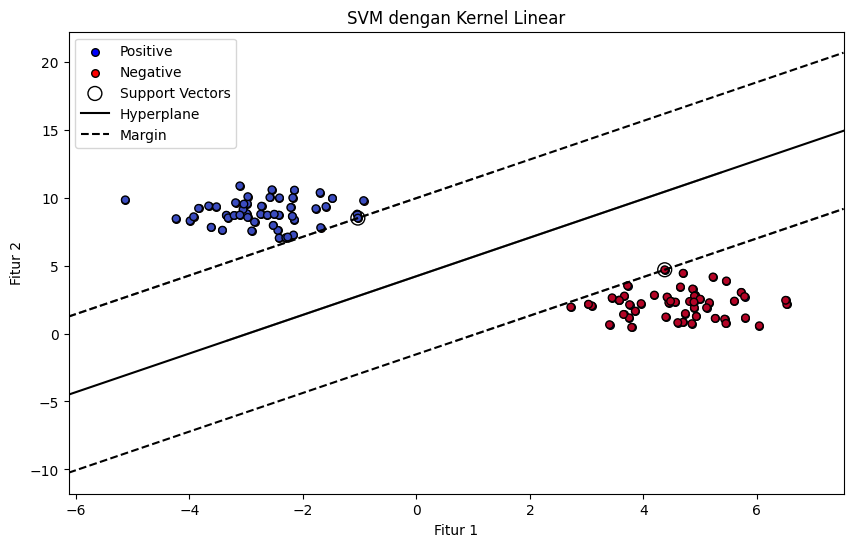

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=42)
clf = SVC(kernel='linear').fit(X, y)

# Create a mesh to plot the decision boundaries
xx = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 500)
yy = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 500)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', s=30, edgecolors='k', label='Positive')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', s=30, edgecolors='k', label='Negative')

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
plt.legend(['Hyperplane', 'Margin', 'Negatif', 'Positif'], loc='upper left')

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend(loc='upper left')

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Compute the margins
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Plot hyperplane
plt.plot(xx, yy, 'k-', label='Hyperplane')

# Plot margins
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')



plt.legend(loc='upper left')

plt.title('SVM dengan Kernel Linear')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()


In [ ]:
# prompt: kode untuk melihat scatter plots dari hasil klasifikasi support vector machine dengan kernel linear berdasarkan kode saya di atas,
# JANGAN DI RUN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Generate some random data
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, 100)

# Create a support vector machine classifier
clf = SVC(kernel='linear')

# Fit the classifier to the data
clf.fit(X, y)

# Create a mesh to plot the decision boundaries
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500)
yy = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

# Plot the data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', s=30, edgecolors='k', label='Positive')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', s=30, edgecolors='k', label='Negative')

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-', label='Hyperplane')

# Plot the margins
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

# Add labels and legend
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('SVM dengan Kernel Linear')
plt.legend()
plt.show()


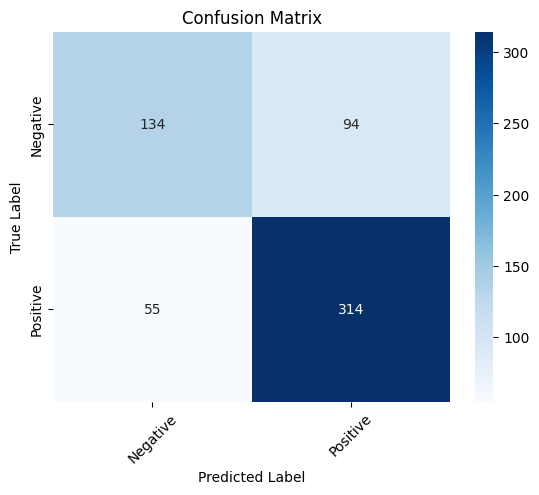

In [21]:
# prompt: kode confusion matrix yang sesuai dengan code saya diatas dengan gambar

import matplotlib.pyplot as plt
import seaborn as sns
# Get the confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Define class labels
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Set tick labels for x-axis and y-axis
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [22]:
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text: # Iterate over words, not word, score
        score_pos = 0 # These variables are not used
        score_neg = 0
        # You'll need to determine how to get a sentiment score for each word here
        # For example, you might use a sentiment analysis library
        score = get_sentiment_score(word) # Placeholder - replace with actual sentiment analysis

        if score in [1, 2, 3]:
            negative_words.append(word)
        elif score in [4, 5]:
            positive_words.append(word)
        # No need for an else here, as words with unknown sentiment are ignored

    return positive_words, negative_words

In [23]:
# prompt: kode wordcloud positif dan negatif

import matplotlib.pyplot as plt
# Positive words wordcloud
positive_words = ' '.join([word for word in dataset['Text_Stemming'][dataset['label'] == 'positive']])
wordcloud_positive = WordCloud(width=800, height=500, background_color='white', stopwords=STOPWORDS).generate(positive_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words Wordcloud')
plt.show()

# Negative words wordcloud
negative_words = ' '.join([word for word in dataset['Text_Stemming'][dataset['label'] == 'negative']])
wordcloud_negative = WordCloud(width=800, height=500, background_color='white', stopwords=STOPWORDS).generate(negative_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words Wordcloud')
plt.show()

plt.savefig('Positive_Words_Wordcloud.png')
plt.savefig('Negative_words_Wordcloud.png')

TypeError: sequence item 0: expected str instance, list found

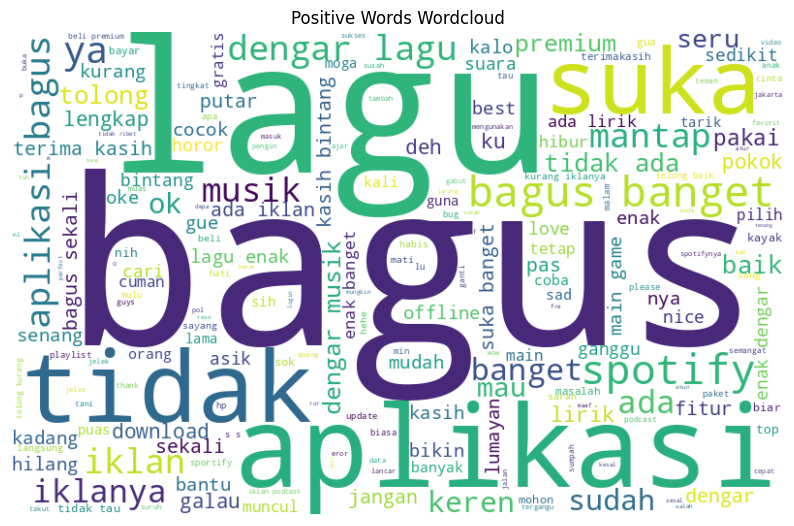

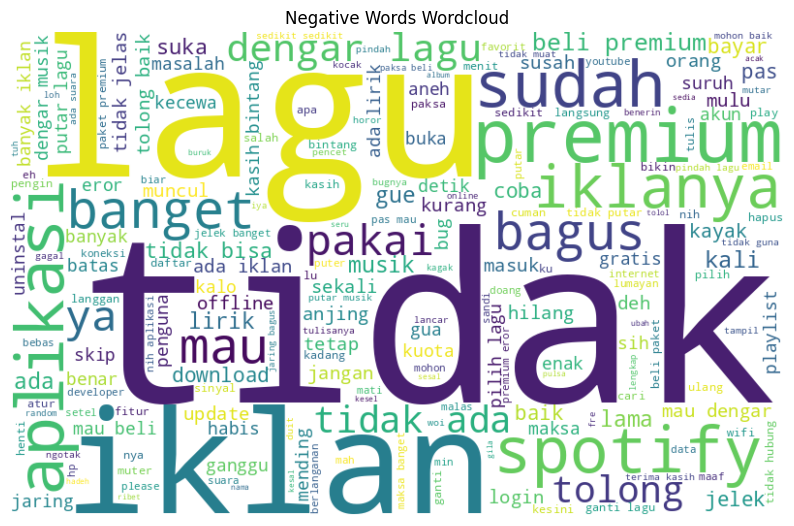

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Positive words wordcloud
positive_words = ' '.join([' '.join(word) for word in dataset['Text_Stemming'][dataset['label'] == 'positive']])  # Join words within lists first
wordcloud_positive = WordCloud(width=800, height=500, background_color='white', stopwords=STOPWORDS).generate(positive_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words Wordcloud')
plt.show()

# Negative words wordcloud
negative_words = ' '.join([' '.join(word) for word in dataset['Text_Stemming'][dataset['label'] == 'negative']])  # Join words within lists first
wordcloud_negative = WordCloud(width=800, height=500, background_color='white', stopwords=STOPWORDS).generate(negative_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words Wordcloud')
plt.show()

plt.savefig('Positive_Words_Wordcloud.png')
plt.savefig('Negative_words_Wordcloud.png')

In [24]:
positive_text = dataset[dataset['label'] == 'positive']['Text_Stemming']
negative_text = dataset[dataset['label'] == 'negative']['Text_Stemming']

In [ ]:
cv_positive = CountVectorizer()
positive_counts = cv_positive.fit_transform(positive_text)

In [ ]:
cv_negative = CountVectorizer()
negative_counts = cv_negative.fit_transform(negative_text)

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'positive_text' is a Pandas Series of lists of words
positive_text_joined = positive_text.apply(' '.join)  # Join words in each list into a single string

cv_positive = CountVectorizer()
positive_counts = cv_positive.fit_transform(positive_text_joined)  # Use the joined strings

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'positive_text' is a Pandas Series of lists of words
negative_text_joined = negative_text.apply(' '.join)  # Join words in each list into a single string

cv_negative = CountVectorizer()
negative_counts = cv_negative.fit_transform(negative_text_joined)  # Use the joined strings

In [32]:
# For positive words:
positive_word_counts = pd.DataFrame({
    'word': cv_positive.get_feature_names_out(),
    'count': positive_counts.sum(axis=0).A1
}).sort_values('count', ascending=False)

# For negative words:
negative_word_counts = pd.DataFrame({
    'word': cv_negative.get_feature_names_out(),
    'count': negative_counts.sum(axis=0).A1
}).sort_values('count', ascending=False)

# Print the top 10 most frequent words for each label
print("positive words:")
print(positive_word_counts.head(5))

print("\n negative words:")
print(negative_word_counts.head(5))

positive words:
          word  count
119      bagus    737
743       lagu    417
74    aplikasi    286
144     banget    276
1389     tidak    251

 negative words:
          word  count
1479     tidak    632
765       lagu    424
1159   premium    331
564      iklan    320
76    aplikasi    205


In [33]:
# prompt: kode untuk melihat jumlah kata kata yang sering muncul pada label positif dan label negatif  berdasarkan kode saya

def count_words(text, label):

  word_counts = {}
  for i, sentence in enumerate(text):
    if dataset['label'][i] == label:
      for word in sentence.split():
        word_counts[word] = word_counts.get(word, 0) + 1

  return word_counts

positive_word_counts = count_words(dataset['Text_Stemming'], 'positive')
negative_word_counts = count_words(dataset['Text_Stemming'], 'negative')

# Print the top 10 most frequent words for each label
print("Kata-kata yang sering muncul pada label positif:")
for word, count in sorted(positive_word_counts.items(), key=lambda item: item[1], reverse=True)[:10]:
  print(f"{word}: {count}")

print("\n Kata-kata yang sering muncul pada label negatif:")
for word, count in sorted(negative_word_counts.items(), key=lambda item: item[1], reverse=True)[:10]:
  print(f"{word}: {count}")


AttributeError: 'list' object has no attribute 'split'

In [34]:
def count_words(text, label):
  """
  Counts the number of times each word appears in the given text for a specific label.

  Args:
    text: A list of strings containing the text data.
    label: The label to filter the data by.

  Returns:
    A dictionary containing the word counts for the given label.
  """

  word_counts = {}
  for sentence, label_ in zip(text, dataset['label']): # Iterate over the text and labels simultaneously using zip
    if label_ == label:
      for word in sentence.split():
        word_counts[word] = word_counts.get(word, 0) + 1

  return word_counts

positive_word_counts = count_words(dataset['Text_Stemming'], 'positive')
negative_word_counts = count_words(dataset['Text_Stemming'], 'negative')

# Print the top 10 most frequent words for each label
print("Kata-kata yang sering muncul pada label positif:")
for word, count in sorted(positive_word_counts.items(), key=lambda item: item[1], reverse=True)[:10]:
  print(f"{word}: {count}")

print("\n Kata-kata yang sering muncul pada label negatif:")
for word, count in sorted(negative_word_counts.items(), key=lambda item: item[1], reverse=True)[:10]:
  print(f"{word}: {count}")

AttributeError: 'list' object has no attribute 'split'

In [35]:
# prompt: kode untuk melihat jumlah kata kata yang sering muncul pada label positive dan label negative  berdasarkan kode yg saya buat

positive_word_counts = count_words(dataset['Text_Stemming'], 'positive')
negative_word_counts = count_words(dataset['Text_Stemming'], 'negative')

# Print the top 10 most frequent words for each label
print("Kata-kata yang sering muncul pada label positif:")
for word, count in sorted(positive_word_counts.items(), key=lambda item: item[1], reverse=True)[:10]:
  print(f"{word}: {count}")

print("\n Kata-kata yang sering muncul pada label negatif:")
for word, count in sorted(negative_word_counts.items(), key=lambda item: item[1], reverse=True)[:10]:
  print(f"{word}: {count}")


AttributeError: 'list' object has no attribute 'split'